In [1]:
import torch
import numpy as np
from ResNet.dataloader import data_loader

np.random.seed(1)
torch.manual_seed(1)
torch.cuda.manual_seed(1)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

data_dir = r"data"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

batch_size = 64
test_loader = data_loader(
    data_dir=data_dir,
    batch_size=batch_size,
    test=True,
    num_workers=4,
    pin_memory=True,
)

In [2]:
from torchsummary import summary
from ResNet.ResNet import ResNet18

resnet18 = ResNet18(out_neurons=1).to(device)
resnet18.load_state_dict(
    torch.load(
        r"results\ResNet-18\best_net.pth",
        map_location=device,
        weights_only=True,
    )
)

summary(
    resnet18,
    input_size=(3, 224, 224),
    device="cuda" if torch.cuda.is_available() else "cpu",
)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,472
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,928
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,928
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
            Block-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,928
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

Accuracy of the network on the 715 test images: 99.58%
Precision: 0.9956, Recall: 0.9978, F1 Score: 0.9967


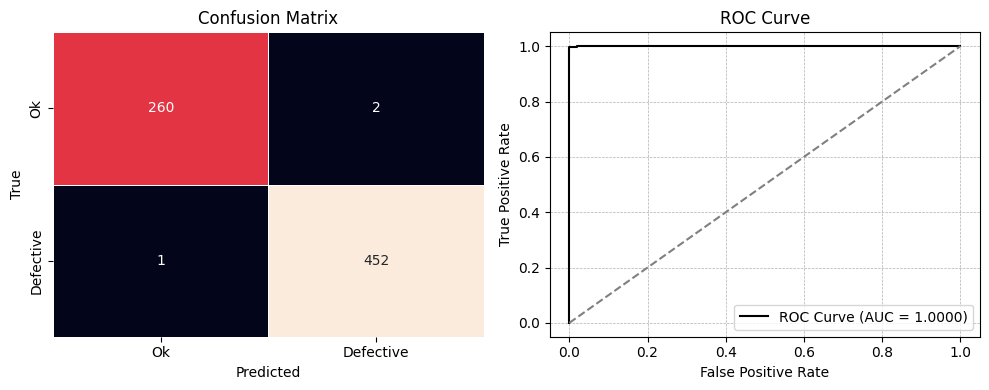

In [3]:
from ResNet.evaluate import evaluate

evaluate(
    model=resnet18,
    test_loader=test_loader,
    device=device,
    threshold=0.1,
    trial_dir=r"results\ResNet-18\threshold",
    save=True,
)

In [4]:
from torchsummary import summary
from ResNet.DeepResNet import ResNet50

resnet50 = ResNet50(out_neurons=1).to(device)
resnet50.load_state_dict(
    torch.load(
        r"results\ResNet-50\best_net.pth",
        map_location=device,
        weights_only=True,
    )
)

summary(
    resnet50,
    input_size=(3, 224, 224),
    device="cuda" if torch.cuda.is_available() else "cpu",
)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,472
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,160
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,928
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,640
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,640
      BatchNorm2d-14          [-1, 256,

Accuracy of the network on the 715 test images: 99.44%
Precision: 0.9956, Recall: 0.9956, F1 Score: 0.9956


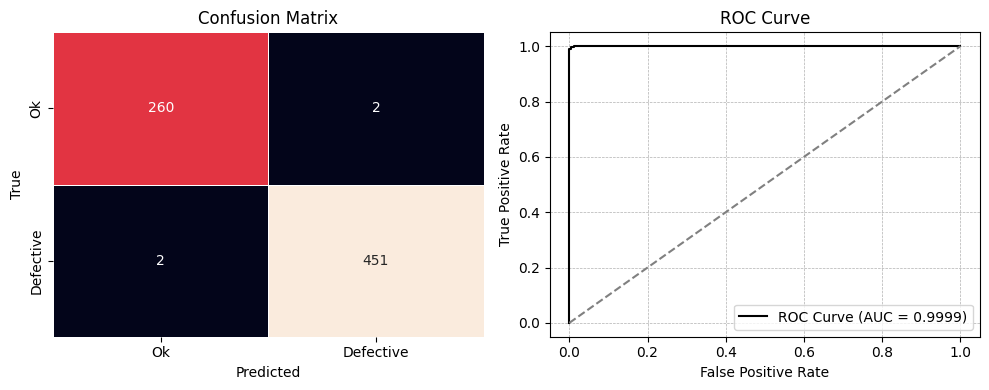

In [5]:
evaluate(
    model=resnet50,
    test_loader=test_loader,
    device=device,
    threshold=0.1,
    trial_dir=r"results\ResNet-50\threshold",
    save=True,
)